In [27]:
import rbo # rbo library calculates Rank Biased Overlap
import csv # for reading the data from the spreadsheet
from typing import Iterable, Tuple, TypeVar # for iterating over the weirdly formatted cells
T = TypeVar("T")

In [28]:
# helper function to iterate over the "Preference" and "Stars" columns in pairs per person
def grouped(iterable: Iterable[T], n=2) -> Iterable[Tuple[T, ...]]:
    """s -> (s0,s1,s2,...sn-1), (sn,sn+1,sn+2,...s2n-1), ..."""
    return zip(*[iter(iterable)] * n)

In [29]:
# open the csv file and read the data into a list
with open("Vote Results - Sheet4.csv", "r") as f:
    reader = csv.reader(f)
    results = list(reader)
    
results

[['Kate T.',
  '',
  'Kendall',
  '',
  'Rebecca Heth',
  '',
  'Rachel Brown',
  '',
  'Sam R.',
  '',
  'Nick Anthony',
  '',
  'Nick Anthony',
  '',
  'Sam Kemp',
  '',
  'Shea',
  '',
  'Peter',
  '',
  'Scott Loane(?)',
  '',
  'Bennett',
  '',
  'Hana Mir',
  '',
  'Skyler Powell',
  '',
  'Annabel',
  '',
  'Yassy Zebaya',
  '',
  'Nathaniel',
  '',
  'Shane Lee',
  '',
  'Sabrina M',
  '',
  'Sebastian Andrade',
  '',
  'Matthew Bookholder (?)',
  '',
  'Mason',
  ''],
 ['Preference',
  'Stars',
  'Preference',
  'Stars',
  'Preference',
  'Stars',
  'Preference',
  'Stars',
  'Preference',
  'Stars',
  'Preference',
  'Stars',
  'Preference',
  'Stars',
  'Preference',
  'Stars',
  'Preference',
  'Stars',
  'Preference',
  'Stars',
  'Preference',
  'Stars',
  'Preference',
  'Stars',
  'Preference',
  'Stars',
  'Preference',
  'Stars',
  'Preference',
  'Stars',
  'Preference',
  'Stars',
  'Preference',
  'Stars',
  'Preference',
  'Stars',
  'Preference',
  'Stars',
  'Pr

In [30]:
# The above output is gross, so we need to unpack the data and associate pairs of columns with each person
names = []

# Looking at just the header rows of the data: 
# create a dictionary object to store the name and two empty lists for their rankings
for name in results[0]:
    if not name == "":
        names.append({"name": name, "pref": [], "stars": []})
        
names

[{'name': 'Kate T.', 'pref': [], 'stars': []},
 {'name': 'Kendall', 'pref': [], 'stars': []},
 {'name': 'Rebecca Heth', 'pref': [], 'stars': []},
 {'name': 'Rachel Brown', 'pref': [], 'stars': []},
 {'name': 'Sam R.', 'pref': [], 'stars': []},
 {'name': 'Nick Anthony', 'pref': [], 'stars': []},
 {'name': 'Nick Anthony', 'pref': [], 'stars': []},
 {'name': 'Sam Kemp', 'pref': [], 'stars': []},
 {'name': 'Shea', 'pref': [], 'stars': []},
 {'name': 'Peter', 'pref': [], 'stars': []},
 {'name': 'Scott Loane(?)', 'pref': [], 'stars': []},
 {'name': 'Bennett', 'pref': [], 'stars': []},
 {'name': 'Hana Mir', 'pref': [], 'stars': []},
 {'name': 'Skyler Powell', 'pref': [], 'stars': []},
 {'name': 'Annabel', 'pref': [], 'stars': []},
 {'name': 'Yassy Zebaya', 'pref': [], 'stars': []},
 {'name': 'Nathaniel', 'pref': [], 'stars': []},
 {'name': 'Shane Lee', 'pref': [], 'stars': []},
 {'name': 'Sabrina M', 'pref': [], 'stars': []},
 {'name': 'Sebastian Andrade', 'pref': [], 'stars': []},
 {'name': 

In [31]:
# Now we can populate those dictionary objects with the remaining rows of data
for line in results[2:]:
    vals = line
    ct = 0
    for pref, star in grouped(vals, 2):
        names[ct]["pref"].append(pref)
        names[ct]["stars"].append(star)
        ct += 1

# names = names[:-1]
names

[{'name': 'Kate T.',
  'pref': ['6', '3', '5', '4', '2', '1'],
  'stars': ['5', '3', '4', '3', '2', '1']},
 {'name': 'Kendall',
  'pref': ['4', '2', '6', '3', '5', '1'],
  'stars': ['4', '2', '5', '3', '5', '0']},
 {'name': 'Rebecca Heth',
  'pref': ['2', '3', '5', '1', '6', '4'],
  'stars': ['3', '4', '5', '1', '5', '4']},
 {'name': 'Rachel Brown',
  'pref': ['6', '4', '5', '2', '3', '1'],
  'stars': ['5', '4', '4', '4', '3', '3']},
 {'name': 'Sam R.',
  'pref': ['5', '3', '6', '1', '2', '4'],
  'stars': ['4', '2', '5', '1', '1', '4']},
 {'name': 'Nick Anthony',
  'pref': ['2', '1', '3', '6', '4', '5'],
  'stars': ['2', '1', '3', '5', '5', '4']},
 {'name': 'Nick Anthony',
  'pref': ['2', '1', '3', '6', '4', '5'],
  'stars': ['2', '1', '3', '5', '5', '4']},
 {'name': 'Sam Kemp',
  'pref': ['5', '3', '4', '2', '6', '1'],
  'stars': ['5', '2', '2', '1', '5', '0']},
 {'name': 'Shea',
  'pref': ['3', '1', '4', '2', '6', '5'],
  'stars': ['4', '2', '5', '1', '5', '5']},
 {'name': 'Peter',
 

In [32]:
# We can build a "similarity matrix" showing how similar each person voted in terms of preference ranking
similarity_matrix = []

for person_a in names:
    person_a_similarities = []
    for person_b in names:
        ab_pref_rbo = rbo.RankingSimilarity(person_a["pref"], person_b["pref"]).rbo()
        person_a_similarities.append(ab_pref_rbo)
    similarity_matrix.append(person_a_similarities)

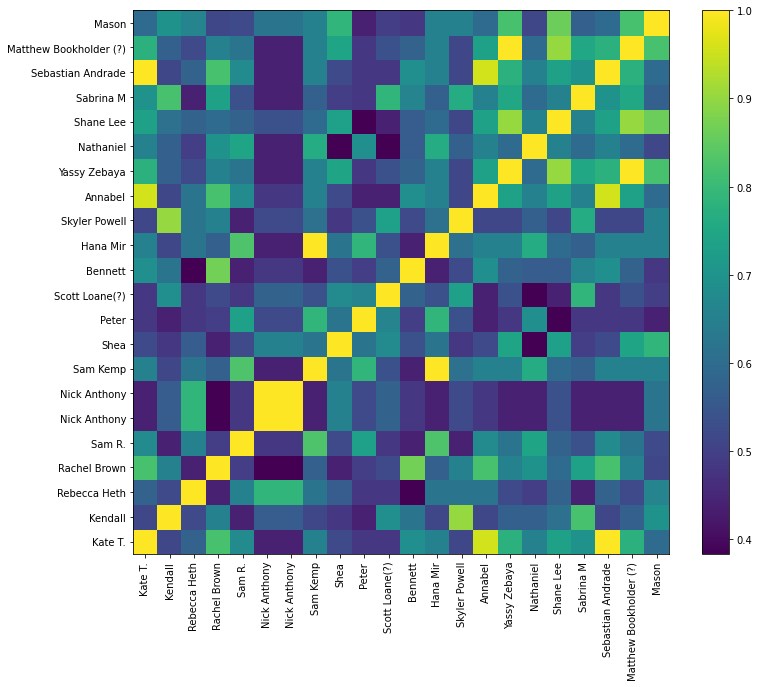

In [34]:
# Finally we can visualize this matrix
import matplotlib.pyplot as plt 
import numpy as np

fig, ax = plt.subplots(figsize=(12,10))
c = ax.pcolormesh(similarity_matrix)
ax.set_xticks(np.arange(0,22) + 0.5)
ax.set_yticks(np.arange(0,22) + 0.5)
ax.set_xticklabels([name["name"] for name in names ], rotation=90)
ax.set_yticklabels([name["name"] for name in names ])
fig.colorbar(c, ax=ax)
